In [1]:
import pandas as pd
import datetime
import numpy as np
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 5, 1)

df = web.DataReader("AAPL", 'yahoo', start, end)
df.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.896912
2020-01-10,312.670013,308.250000,310.600006,310.329987,35161200.0,309.595215
2020-01-13,317.070007,311.149994,311.640015,316.959991,30383000.0,316.209534
2020-01-14,317.570007,312.170013,316.700012,312.679993,40488600.0,311.939667


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report

In [3]:
price_data = df[['High','Low','Open','Close','Volume','Adj Close']]

# sort the values by close and date
#price_data.sort_values(by = ['Adj Close'], inplace = True)

# calculate the change in price
price_data['change_in_price'] = price_data['Adj Close'].diff()

In [4]:
price_data.isnull().sum()

High               0
Low                0
Open               0
Close              0
Volume             0
Adj Close          0
change_in_price    1
dtype: int64

In [5]:
price_data.head(10)

,High,Low,Open,Close,Volume,Adj Close,change_in_price
Date,,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885,NaN
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,-2.913116
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,2.364380
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,-1.406616
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137,4.788605
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.896912,6.424774
2020-01-10,312.670013,308.250000,310.600006,310.329987,35161200.0,309.595215,0.698303
2020-01-13,317.070007,311.149994,311.640015,316.959991,30383000.0,316.209534,6.614319
2020-01-14,317.570007,312.170013,316.700012,312.679993,40488600.0,311.939667,-4.269867


In [6]:
# price_data['change_in_price'].fillna(str(price_data['change_in_price'].values[0]), inplace=True)

In [7]:
price_data.head(20)

,High,Low,Open,Close,Volume,Adj Close,change_in_price
Date,,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885,NaN
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,-2.913116
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,2.364380
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,-1.406616
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137,4.788605
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.896912,6.424774
2020-01-10,312.670013,308.250000,310.600006,310.329987,35161200.0,309.595215,0.698303
2020-01-13,317.070007,311.149994,311.640015,316.959991,30383000.0,316.209534,6.614319
2020-01-14,317.570007,312.170013,316.700012,312.679993,40488600.0,311.939667,-4.269867


In [8]:
up_df, down_df = price_data[['change_in_price']].copy(), price_data[['change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc['change_in_price'] = up_df.loc[(up_df['change_in_price'] < 0), 'change_in_price'] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc['change_in_price'] = down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0

# We need change in price to be absolute.
down_df['change_in_price'] = down_df['change_in_price'].abs()

In [9]:
price_data['down_days'] = down_df['change_in_price']
price_data['up_days'] = up_df['change_in_price']

In [10]:
price_data

,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days
Date,,,,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885,NaN,NaN,NaN
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,-2.913116,2.913116,0.000000
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,2.364380,0.000000,2.364380
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,-1.406616,1.406616,0.000000
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137,4.788605,0.000000,4.788605
...,...,...,...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,283.170013,0.200012,0.000000,0.200012
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,278.579987,-4.590027,4.590027,0.000000
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,287.730011,9.150024,0.000000,9.150024


In [11]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.
price_data.head()

Before NaN Drop we have 84 rows and 9 columns
After NaN Drop we have 83 rows and 9 columns


,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days
Date,,,,,,,,,
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,-2.913116,2.913116,0.000000
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,2.364380,0.000000,2.364380
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,-1.406616,1.406616,0.000000
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137,4.788605,0.000000,4.788605
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.896912,6.424774,0.000000,6.424774


In [12]:
#target = price_data['change_in_price']

In [13]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(price_data, target, random_state=42)

In [14]:
#from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier(n_estimators=200)
#rf = rf.fit(X_train, y_train)
#rf.score(X_test, y_test)

In [19]:
close_groups = price_data.groupby('Date')['change_in_price']


Date
2020-01-03    False
2020-01-06    False
2020-01-07    False
2020-01-08    False
2020-01-09    False
2020-01-10    False
2020-01-13    False
2020-01-14    False
2020-01-15    False
2020-01-16    False
Name: change_in_price, dtype: bool

In [21]:

# Add a new column named 'Prediction' 
price_data['Prediction'] = [0 if x < 0 else 1 for x in price_data['change_in_price']] 
  
# Print the DataFrame 
price_data.head()

C:\Users\adibc\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days,Prediction
Date,,,,,,,,,,
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,-2.913116,2.913116,0.000000,0
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,2.364380,0.000000,2.364380,1
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,-1.406616,1.406616,0.000000,0
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137,4.788605,0.000000,4.788605,1
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.896912,6.424774,0.000000,6.424774,1


In [22]:
price_data.head(30)

,High,Low,Open,Close,Volume,Adj Close,change_in_price,down_days,up_days,Prediction
Date,,,,,,,,,,
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769,-2.913116,2.913116,0.000000,0
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149,2.364380,0.000000,2.364380,1
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533,-1.406616,1.406616,0.000000,0
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137,4.788605,0.000000,4.788605,1
2020-01-09,310.429993,306.200012,307.239990,309.630005,42527100.0,308.896912,6.424774,0.000000,6.424774,1
2020-01-10,312.670013,308.250000,310.600006,310.329987,35161200.0,309.595215,0.698303,0.000000,0.698303,1
2020-01-13,317.070007,311.149994,311.640015,316.959991,30383000.0,316.209534,6.614319,0.000000,6.614319,1
2020-01-14,317.570007,312.170013,316.700012,312.679993,40488600.0,311.939667,-4.269867,4.269867,0.000000,0
2020-01-15,315.500000,309.549988,311.850006,311.339996,30480900.0,310.602844,-1.336823,1.336823,0.000000,0


In [26]:
X_Cols = price_data[['High','Low','Open','Close','Volume','Adj Close','change_in_price', 'down_days', 'up_days']]
Y_Cols = price_data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a random forest Classifier
r_f_c = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = 'gini', random_state = 0)

# Fitting the model
r_f_c.fit(X_train, y_train)

# Make predictions
y_pred = r_f_c.predict(X_test)

In [28]:
# Print the accuracy of the model 
print('Correct Prediction (%):', accuracy_score(y_test, y_pred, normalize = True) * 100.0)

Correct Prediction (%): 95.23809523809523


# Classification Report

In [29]:
# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,1.000000,0.900000,0.947368,10.000000
Up Day,0.916667,1.000000,0.956522,11.000000
accuracy,0.952381,0.952381,0.952381,0.952381
macro avg,0.958333,0.950000,0.951945,21.000000
weighted avg,0.956349,0.952381,0.952163,21.000000


# Calculating Feature Importance and Graphing

In [59]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(r_f_c.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

change_in_price    0.361765
down_days          0.300440
up_days            0.284271
Volume             0.013213
Close              0.013003
Adj Close          0.010211
Low                0.007424
Open               0.005110
High               0.004563
dtype: float64

In [60]:
import matplotlib.pyplot as plt

imp_featuredf = pd.DataFrame(feature_imp)
imp_featuredf

,0
change_in_price,0.361765
down_days,0.300440
up_days,0.284271
Volume,0.013213
Close,0.013003
Adj Close,0.010211
Low,0.007424
Open,0.005110
High,0.004563


In [64]:
imp_featuredf['Features']=imp_featuredf.index
maindf = imp_featuredf.reset_index(drop=True)

In [65]:
maindf.head()

,0,Features
0,0.361765,change_in_price
1,0.300440,down_days
2,0.284271,up_days
3,0.013213,Volume
4,0.013003,Close


In [66]:
maindf.rename(columns={0: "Percentage"})

,Percentage,Features
0,0.361765,change_in_price
1,0.300440,down_days
2,0.284271,up_days
3,0.013213,Volume
4,0.013003,Close
5,0.010211,Adj Close
6,0.007424,Low
7,0.005110,Open
8,0.004563,High


In [70]:
import matplotlib.pyplot as plt

In [72]:
maindf.set_index('Features', inplace=True)

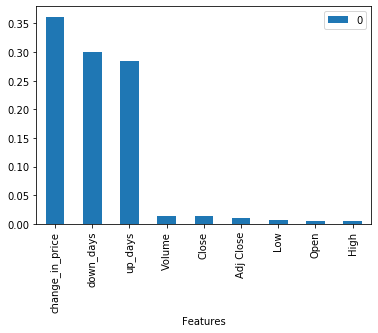

In [73]:
maindf.plot(kind='bar')
plt.show()